In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

In [2]:
# Display the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:

# Get basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Convert "TotalCharges" to numeric, handling any conversion errors.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Drop rows with missing values in "TotalCharges."
df.dropna(subset=['TotalCharges'], inplace=True)


In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

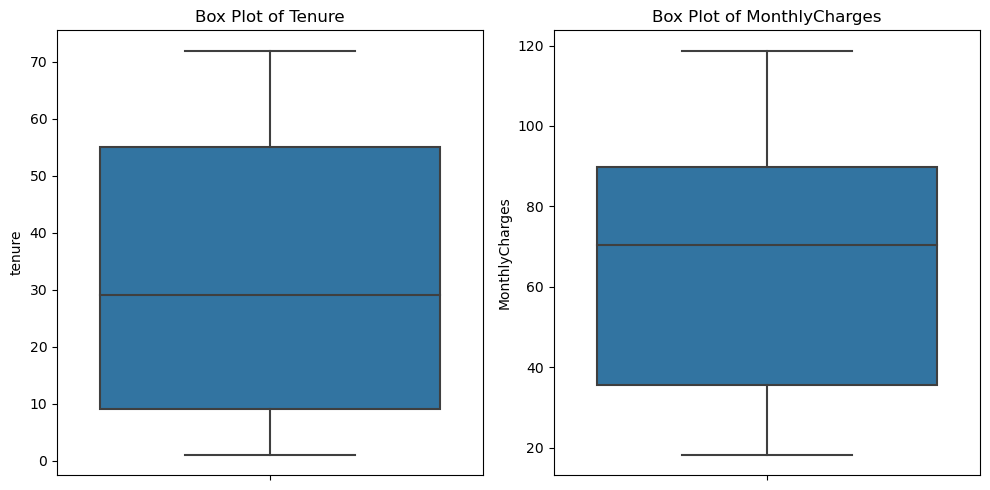

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots for box plots.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='tenure')
plt.title('Box Plot of Tenure')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='MonthlyCharges')
plt.title('Box Plot of MonthlyCharges')

plt.tight_layout()
plt.show()


In [8]:
# For binary columns (e.g., "gender", "Partner"):
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

# For other categorical columns (e.g., "InternetService"):
df = pd.get_dummies(df, columns=['InternetService', 'PaymentMethod', 'Contract'])


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('MonthlyCharges', axis=1)
y = df['MonthlyCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)
